# Analysis of multivariate data

- Regression line
- Correlation

Author:  Thomas Haslwanter, Date:    Oct-2015

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
from numpy.linalg import lstsq
from urllib.request import urlopen
import statsmodels.api as sm

## Regression Line

Fit a line, using the powerful "ordinary least square" method of pandas.

*Data from 24 type 1 diabetic patients, relating Fasting blood glucose (mmol/l) to mean circumferential shortening velocity (%/sec), derived form echocardiography.*


In [2]:
# Get the data
url_base = 'https://raw.githubusercontent.com/thomas-haslwanter/statsintro_python/master/ipynb/Data/data_altman/'
inFile = 'altman_11_6.txt'
url = url_base + inFile
data = np.genfromtxt(urlopen(url), delimiter=',')

(array([ 1.098,  0.022]), array([ 0.986]), 2, array([ 54.079,   1.838]))


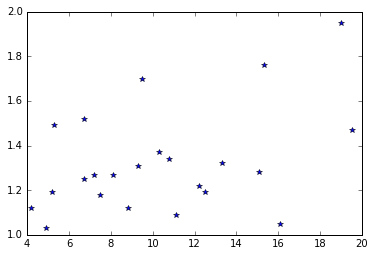

In [3]:
# Solving the equation "by hand"

# First I have to delete rows containing "nan"
a,b = np.where(np.isnan(data))
data = np.delete(data, a, axis=0)

x,y = data[:,0], data[:,1]
plt.plot(x,y,'*')

# Create the design matrix
Xmat = sm.add_constant(x)

# Calculate the parameters
params = lstsq(Xmat, y)
np.set_printoptions(precision=3)
print(params)

pandas handles "nan" gracefully, and also provides more information about the fit. So let's use pandas, and compare the results

In [4]:
# Bring them into pandas DataFrame format, and calculate the
# "optimal least squares (ols)" regression fit:
df = pd.DataFrame(data, columns=['glucose', 'Vcf'])
model = pd.ols(y=df['Vcf'], x=df['glucose'])
print(model.summary)


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         23
Number of Degrees of Freedom:   2

R-squared:         0.1737
Adj R-squared:     0.1343

Rmse:              0.2167

F-stat (1, 21):     4.4140, p-value:     0.0479

Degrees of Freedom: model 1, resid 21

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x     0.0220     0.0105       2.10     0.0479     0.0015     0.0425
     intercept     1.0978     0.1175       9.34     0.0000     0.8676     1.3281
---------------------------------End of Summary---------------------------------



## Correlation

Pearson correlation, and two types of rank correlation (Spearman, Kendall)

*Comparing age and percentage of body-fat (measured by dual-photon absorptiometry) for 18 normal adults.*

In [5]:
# Get the data
inFile = 'altman_11_1.txt'
url = url_base + inFile
data = np.genfromtxt(urlopen(url), delimiter=',')

x = data[:,0]
y = data[:,1]

In [6]:
# Calculate correlations
corr = {}
corr['pearson'], _ = stats.pearsonr(x,y)
corr['spearman'], _ = stats.spearmanr(x,y)
corr['kendall'], _ = stats.kendalltau(x,y)

print(corr)    

{'kendall': 0.57620948508912251, 'pearson': 0.79208623217849128, 'spearman': 0.75387958553761569}


In [7]:
# Show that Spearman's rho is just the Pearson's R of the rank-ordered data
r_rankordered = stats.pearsonr(stats.rankdata(x), stats.rankdata(y))[0]
print("Spearman's rho = {0:5.3f}, and Pearson's r (rankordered) = {1:5.3f}".format(corr['spearman'], r_rankordered))

Spearman's rho = 0.754, and Pearson's r (rankordered) = 0.754
